In [ ]:
import os, types
importport pandas as pd
fromimportfrom botocore.client import Config
impor t ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='iJ6QxI4EwtndQ0hKUoM_rU5IcAPLEd2UOIBwZTs1YkhY',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'si612capstonekelompok4-donotdelete-pr-6fwqmrzlo5ecnq'
object_key = 'tweets.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_1 = pd.read_csv(body)
df_1

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


In [ ]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 39.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.1/775.1 kB 41.6 MB/s eta 0:00:00


In [ ]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 9.8 MB/s eta 0:00:00ta 0:00:01


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/wsuser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/wsuser/nltk_data...


True

In [ ]:
df_1.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


In [ ]:
df_1.describe()

,id,target
count,11370.000000,11370.000000
mean,5684.500000,0.185928
std,3282.380615,0.389066
min,0.000000,0.000000
25%,2842.250000,0.000000
50%,5684.500000,0.000000
75%,8526.750000,0.000000
max,11369.000000,1.000000


In [ ]:
df_1['target'].value_counts()

0    9256
1    2114
Name: target, dtype: int64

In [ ]:
# Data Cleaning
df_1.drop(['location'], axis=1, inplace=True)

In [ ]:
# Preprocess text data
import string
import re

# Define stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocess text function
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove emojis and non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    # Remove numbers and special characters
    text = re.sub(r'\W+', ' ', text)
    # Remove words shorter than 5 characters or longer than 15 characters
    text = ' '.join([word for word in text.split() if 5 <= len(word) <= 15])
    # Remove numbers and single letter words
    text = re.sub(r'\d+|^\w$', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Lemmatize words
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

# Applying the preprocessing to the dataset
df_1['cleaned_text'] = df_1['text'].apply(preprocess_text)
df_1

,id,keyword,text,target,cleaned_text
0,0,ablaze,"Communal violence in Bhainsa, Telangana. ""Ston...",1,communal violence bhainsa telangana stone pelt...
1,1,ablaze,Telangana: Section 144 has been imposed in Bha...,1,telangana section imposed bhainsa january clas...
2,2,ablaze,Arsonist sets cars ablaze at dealership https:...,1,arsonist ablaze dealership
3,3,ablaze,Arsonist sets cars ablaze at dealership https:...,1,arsonist ablaze dealership
4,4,ablaze,"""Lord Jesus, your love brings freedom and pard...",0,jesus brings freedom pardon spirit heart ablaze
...,...,...,...,...,...
11365,11365,wrecked,Media should have warned us well in advance. T...,0,medium warned advance wrecked whole night refu...
11366,11366,wrecked,i feel directly attacked 💀 i consider moonbin ...,0,directly attacked consider moonbin jinjin curr...
11367,11367,wrecked,i feel directly attacked 💀 i consider moonbin ...,0,directly attacked consider moonbin jinjin curr...
11368,11368,wrecked,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0,remember outcast wrecked nerve braincells jdks...


EDA (Exploratory Data Analysis)

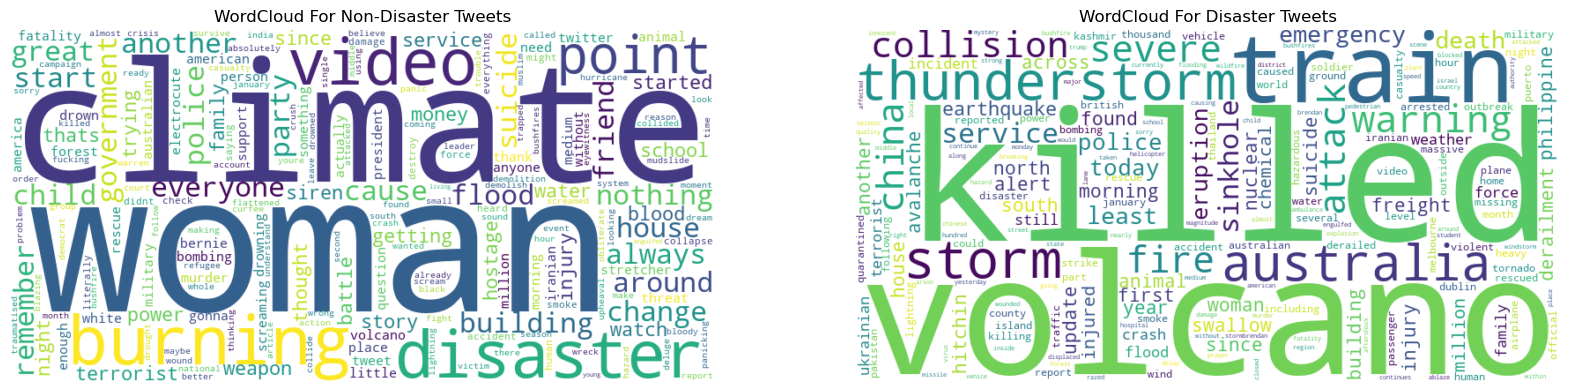

In [ ]:
from collections import Counter

# Function to generate word cloud with common words removed
def generate_wordcloud_with_common_words_removed(word_freq, title, common_words, ax):
    filtered_text = {word: freq for word, freq in word_freq.items() if word not in common_words}
    wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(filtered_text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title)
    ax.axis('off')

# Prepare text for word clouds
non_disaster_tweets = ' '.join(df_1[df_1['target'] == 0]['cleaned_text'])
disaster_tweets = ' '.join(df_1[df_1['target'] == 1]['cleaned_text'])

# Count word frequencies
non_disaster_word_freq = Counter(non_disaster_tweets.split())
disaster_word_freq = Counter(disaster_tweets.split())

# Define threshold frequency for common words
threshold_freq = 100

# Get common words based on threshold frequency for non-disaster tweets
common_non_disaster_words = {word for word, freq in non_disaster_word_freq.items() if freq > threshold_freq}

# Get common words based on threshold frequency for disaster tweets
common_disaster_words = {word for word, freq in disaster_word_freq.items() if freq > threshold_freq}

# Generate word cloud for non-disaster and disaster tweets with common words removed
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

generate_wordcloud_with_common_words_removed(non_disaster_word_freq, 'WordCloud For Non-Disaster Tweets', common_non_disaster_words, axs[0])
generate_wordcloud_with_common_words_removed(disaster_word_freq, 'WordCloud For Disaster Tweets', common_disaster_words, axs[1])

plt.show()

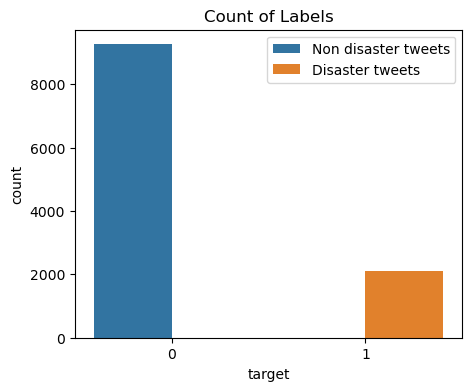

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x = 'target', data = df_1, hue='target')

plt.title('Count of Labels')
plt.legend(labels=['Non disaster tweets', 'Disaster tweets'])
plt.show()

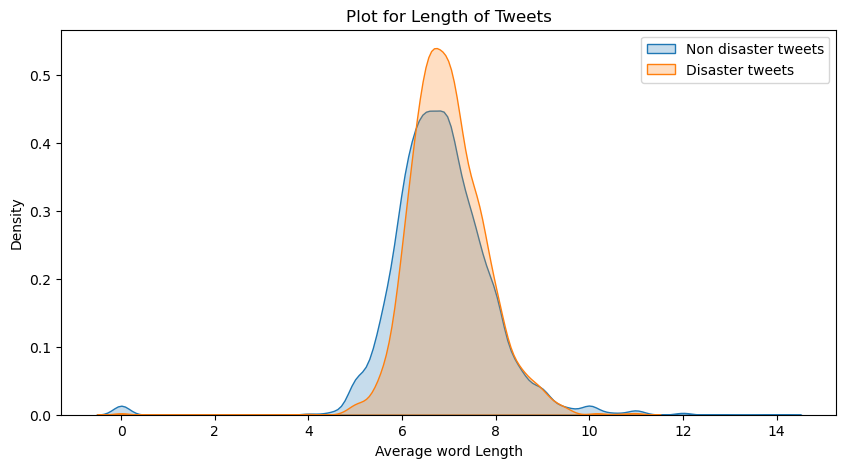

In [ ]:
# Calculate average word length
df_1['Average word Length'] = df_1['cleaned_text'].apply(lambda x: np.mean([len(i) for i in x.split()]) if x else 0)

# Plotting the KDE plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(df_1['Average word Length'][df_1['target'] == 0], fill=True, label='Non disaster tweet')
sns.kdeplot(df_1['Average word Length'][df_1['target'] == 1], fill=True, label='Disaster tweet')

plt.title('Plot for Length of Tweets')
plt.legend(labels=['Non disaster tweets', 'Disaster tweets'])
plt.show()

Feature Engineering

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Tokenization and padding
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df_1['cleaned_text'])
sequences = tokenizer.texts_to_sequences(df_1['cleaned_text'])
padded_sequences = pad_sequences(sequences, maxlen=100)

print(padded_sequences)

[[   0    0    0 ...   29  227  558]
 [   0    0    0 ... 1265  236  107]
 [   0    0    0 ...  730  558 4616]
 ...
 [   0    0    0 ...  441  511 4613]
 [   0    0    0 ...    1    1 1830]
 [   0    0    0 ...    1  511  279]]


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df_1['target'], test_size=0.2, random_state=42)

# Print out the shapes of the resulting datasets to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9096, 100)
Shape of X_test: (2274, 100)
Shape of y_train: (9096,)
Shape of y_test: (2274,)


Model Architecture Definition

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the updated model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=5000, output_dim=2))  # Reduced input_dim
model.add(tf.keras.layers.SpatialDropout1D(0.8))
model.add(tf.keras.layers.LSTM(200, dropout=0.6, recurrent_dropout=0.3))
model.add(tf.keras.layers.Dropout(0.6))
model.add(tf.keras.layers.Dense(150, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 2)           10000     
                                                                 
 spatial_dropout1d_10 (Spati  (None, None, 2)          0         
 alDropout1D)                                                    
                                                                 
 lstm_12 (LSTM)              (None, 200)               162400    
                                                                 
 dropout_33 (Dropout)        (None, 200)               0         
                                                                 
 dense_33 (Dense)            (None, 150)               30150     
                                                                 
 dropout_34 (Dropout)        (None, 150)               0         
                                                     

model Training

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
285/285 [==============================] - 117s 402ms/step - loss: 0.5117 - accuracy: 0.8106 - val_loss: 0.4820 - val_accuracy: 0.8259
Epoch 2/20
285/285 [==============================] - 115s 403ms/step - loss: 0.4942 - accuracy: 0.8111 - val_loss: 0.4857 - val_accuracy: 0.8259
Epoch 3/20
285/285 [==============================] - 117s 409ms/step - loss: 0.4831 - accuracy: 0.8111 - val_loss: 0.4270 - val_accuracy: 0.8259
Epoch 4/20
285/285 [==============================] - 119s 416ms/step - loss: 0.4600 - accuracy: 0.8203 - val_loss: 0.4092 - val_accuracy: 0.8320
Epoch 5/20
285/285 [==============================] - 116s 406ms/step - loss: 0.4518 - accuracy: 0.8249 - val_loss: 0.3684 - val_accuracy: 0.8606
Epoch 6/20
285/285 [==============================] - 116s 407ms/step - loss: 0.4515 - accuracy: 0.8233 - val_loss: 0.3790 - val_accuracy: 0.8492
Epoch 7/20
285/285 [==============================] - 115s 403ms/step - loss: 0.4434 - accuracy: 0.8265 - val_loss: 0.3593 -

model evaluasi

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Test Loss: 0.3018437623977661
Test Accuracy: 0.8852242827415466


In [ ]:
# Make predictions on the test set
predictions = (model.predict(X_test) > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, predictions))

72/72 [==============================] - 4s 52ms/step
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1878
           1       0.89      0.39      0.54       396

    accuracy                           0.89      2274
   macro avg       0.89      0.69      0.74      2274
weighted avg       0.89      0.89      0.87      2274



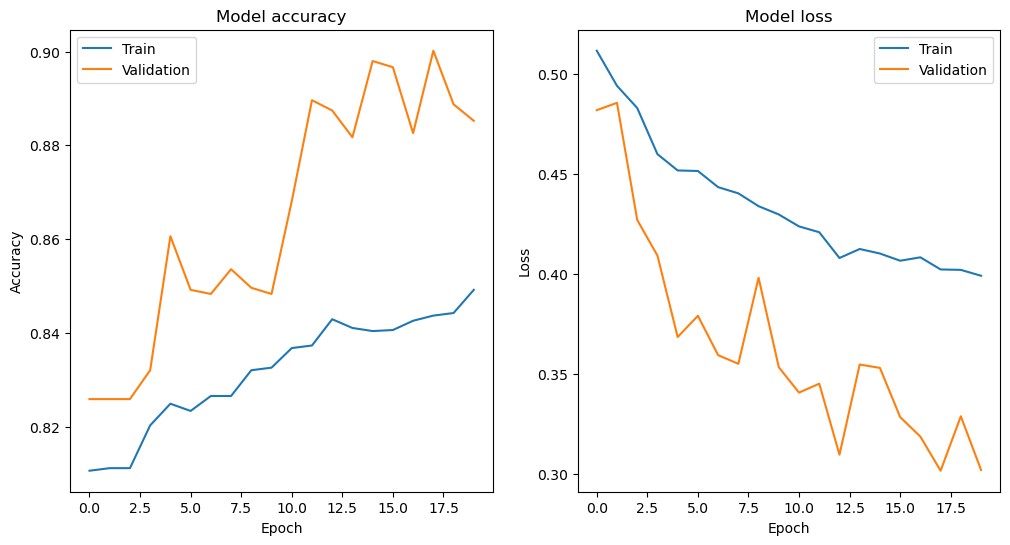

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))  # Ukuran total gambar (lebar, tinggi)

plt.subplot(1, 2, 1)  # Subplot 1: Gambar di baris pertama, kolom pertama
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)  # Subplot 2: Gambar di baris pertama, kolom kedua
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

<Axes: >

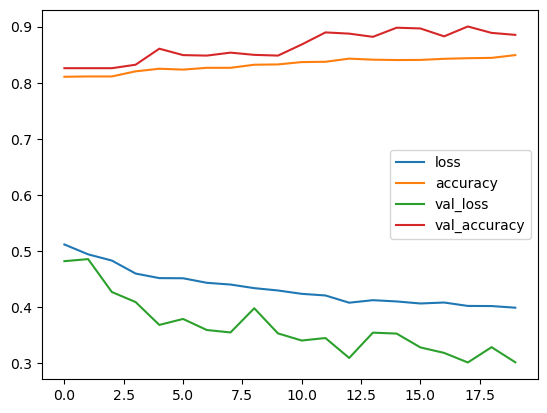

In [ ]:
pd.DataFrame(history.history).plot()

72/72 [==============================] - 4s 48ms/step


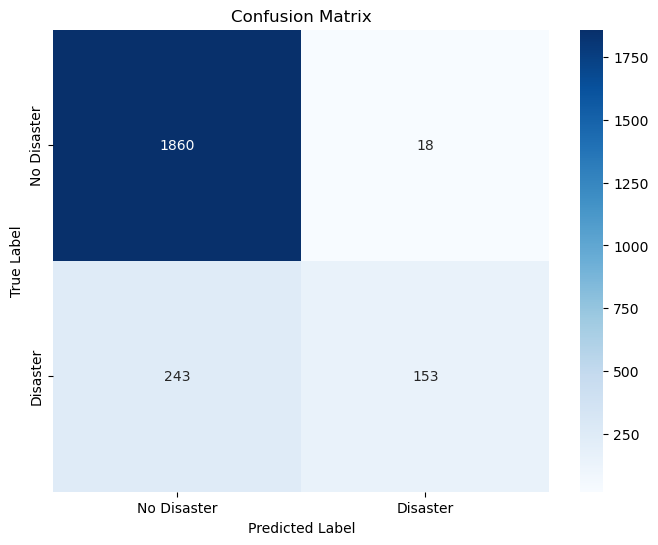

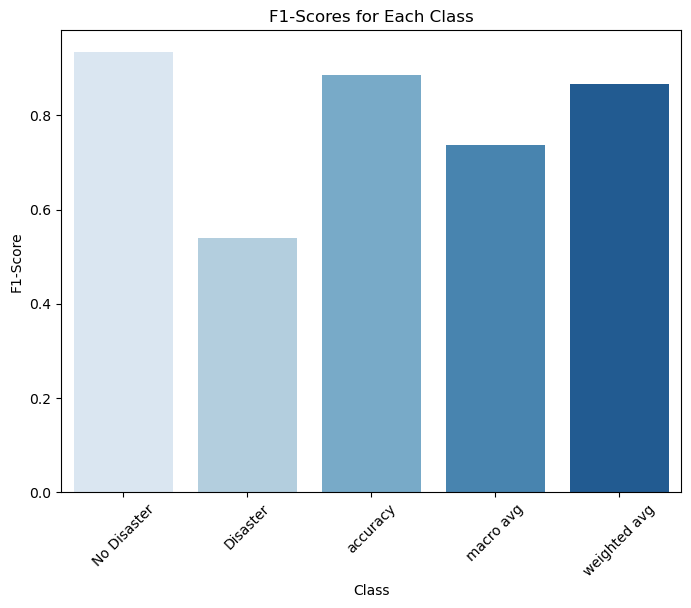

In [ ]:
# Assuming predictions are the output of your model
predictions_probabilities = model.predict(X_test)

# Convert probabilities to binary labels based on a threshold (e.g., 0.5)
predictions_binary = (predictions_probabilities > 0.5).astype(int)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disaster', 'Disaster'], yticklabels=['No Disaster', 'Disaster'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generate classification report
report = classification_report(y_test, predictions_binary, target_names=['No Disaster', 'Disaster'], output_dict=True)

# Convert report to DataFrame for easier visualization
report_df = pd.DataFrame(report).transpose()

# Plot F1-score from classification report
plt.figure(figsize=(8, 6))
sns.barplot(x=report_df.index, y=report_df['f1-score'], palette="Blues")
plt.title("F1-Scores for Each Class")
plt.xlabel("Class")
plt.ylabel("F1-Score")
plt.xticks(rotation=45)
plt.show()

model saving

In [ ]:
# Save model
model.save('disaster_tweets_model.h5')

model deployment

In [ ]:
# Compres
!tar -zcvf disaster_tweets_model.h5.tgz disaster_tweets_model.h5

disaster_tweets_model.h5


In [ ]:
!pip install -U -q ibm-watson-machine-learning

In [ ]:
# Mengambil nilai dari variabel lingkungan
api_key = 'mt-gUueaCpeN_efrCEpUzn0FgGpysFe6TLa9fdH-JBbT'
location = 'us-south'

# Menggunakan nilai untuk membuat wml_credentials
wml_credentials = {
    "apikey": api_key,
    "url": 'https://' + location + '.ml.cloud.ibm.com'
}

# Menampilkan wml_credentials untuk memastikan nilai telah diambil dengan benar
print(wml_credentials)

{'apikey': 'mt-gUueaCpeN_efrCEpUzn0FgGpysFe6TLa9fdH-JBbT', 'url': 'https://us-south.ml.cloud.ibm.com'}


In [ ]:
from ibm_watson_machine_learning import APIClient

client = APIClient(wml_credentials)

client.spaces.list(limit=10)

------------------------------------  -------------------------  ------------------------
ID                                    NAME                       CREATED
fd1e9fea-50c6-48e6-bc64-4a5997732160  SI6_12_Capstone_Kelompok4  2024-06-16T15:16:55.326Z
------------------------------------  -------------------------  ------------------------


,ID,NAME,CREATED
0,fd1e9fea-50c6-48e6-bc64-4a5997732160,SI6_12_Capstone_Kelompok4,2024-06-16T15:16:55.326Z


In [ ]:
space_id = 'fd1e9fea-50c6-48e6-bc64-4a5997732160'

client.set.default_space(space_id)

'SUCCESS'

In [ ]:
sofware_spec_uid = client.software_specifications.get_id_by_name("runtime-23.1-py3.10")
print(sofware_spec_uid)

336b29df-e0e1-5e7d-b6a5-f6ab722625b2


In [ ]:
model_details = client.repository.store_model(
    model="disaster_tweets_model.h5.tgz",
    meta_props={
        client.repository.ModelMetaNames.NAME: "Capstone Project",
        client.repository.ModelMetaNames.TYPE: "tensorflow_2.12",
        client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sofware_spec_uid
    })

model_id = client.repository.get_model_id(model_details)
print(f"Model ID - {model_id}")
print(model_details)

Model ID - 3ec8f688-01e0-4cb9-a64e-a41986c390a3
{'entity': {'hybrid_pipeline_software_specs': [], 'software_spec': {'id': '336b29df-e0e1-5e7d-b6a5-f6ab722625b2', 'name': 'runtime-23.1-py3.10'}, 'type': 'tensorflow_2.12'}, 'metadata': {'created_at': '2024-06-16T19:06:42.450Z', 'id': '3ec8f688-01e0-4cb9-a64e-a41986c390a3', 'modified_at': '2024-06-16T19:06:44.834Z', 'name': 'Capstone Project', 'owner': 'IBMid-698000FNYV', 'resource_key': 'f210ba55-dd49-4a87-ab35-da73aea847d8', 'space_id': 'fd1e9fea-50c6-48e6-bc64-4a5997732160'}, 'system': {'warnings': []}}


In [ ]:
import json

published_model_id = client.repository.get_model_id(model_details)
model_details = client.repository.get_details(published_model_id)
print(json.dumps(model_details, indent=2))

{
  "entity": {
    "hybrid_pipeline_software_specs": [],
    "software_spec": {
      "id": "336b29df-e0e1-5e7d-b6a5-f6ab722625b2",
      "name": "runtime-23.1-py3.10"
    },
    "type": "tensorflow_2.12"
  },
  "metadata": {
    "created_at": "2024-06-16T19:06:42.450Z",
    "id": "3ec8f688-01e0-4cb9-a64e-a41986c390a3",
    "modified_at": "2024-06-16T19:06:47.144Z",
    "name": "Capstone Project",
    "owner": "IBMid-698000FNYV",
    "resource_key": "f210ba55-dd49-4a87-ab35-da73aea847d8",
    "space_id": "fd1e9fea-50c6-48e6-bc64-4a5997732160"
  },
  "system": {
    "warnings": []
  }
}


In [ ]:
models_details = client.repository.list_models()

------------------------------------  ----------------  ------------------------  ---------------  ----------  ----------------
ID                                    NAME              CREATED                   TYPE             SPEC_STATE  SPEC_REPLACEMENT
3ec8f688-01e0-4cb9-a64e-a41986c390a3  Capstone Project  2024-06-16T19:06:42.002Z  tensorflow_2.12  supported
1b2086ce-7a43-4892-a711-b87bf9a89a47  Capstone Project  2024-06-16T15:30:18.002Z  tensorflow_2.12  supported
------------------------------------  ----------------  ------------------------  ---------------  ----------  ----------------


In [ ]:
print(published_model_id)

3ec8f688-01e0-4cb9-a64e-a41986c390a3


In [ ]:
deployment_props = {
    client.deployments.ConfigurationMetaNames.NAME: "Capstone Project NLP Deploy",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}
client.repository.ModelMetaNames.show()
deployment = client.deployments.create(
    artifact_uid=model_id,
    meta_props=deployment_props
)

------------------------  ----  --------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
META_PROP NAME            TYPE  REQUIRED  SCHEMA
NAME                      str   Y
DESCRIPTION               str   N
INPUT_DATA_SCHEMA         list  N         {'id(required)': 'string', 'fields(required)': [{'name(required)': 'string', 'type(required)': 'string', 'nullable(optional)': 'string'}]}
TRAINING_DATA_REFERENCES  list  N         [{'name(optional)': 'string', 'type(required)': 'string', 'connection(required)': {'endpoint_url(required)': 'string', 'access_key_id(required)': 'string', 'secret_access_key(required)': 'string'},

In [ ]:
deployment_id = client.deployments.get_id(deployment)
print(f"Deployment ID : {deployment_id}")

Deployment ID : 5ff32d63-c305-4afd-a953-0f0ad2aa8dd8


In [ ]:
client.deployments.list()

------------------------------------  ---------------------------  -----  ------------------------  -------------  ----------  ----------------
GUID                                  NAME                         STATE  CREATED                   ARTIFACT_TYPE  SPEC_STATE  SPEC_REPLACEMENT
5ff32d63-c305-4afd-a953-0f0ad2aa8dd8  Capstone Project NLP Deploy  ready  2024-06-16T19:07:44.503Z  model          supported
7448e60a-2fda-44ef-b199-8e84b33467a6  Capstone Project NLP Deploy  ready  2024-06-16T15:34:50.019Z  model          supported
------------------------------------  ---------------------------  -----  ------------------------  -------------  ----------  ----------------


,GUID,NAME,STATE,CREATED,ARTIFACT_TYPE,SPEC_STATE,SPEC_REPLACEMENT
0,5ff32d63-c305-4afd-a953-0f0ad2aa8dd8,Capstone Project NLP Deploy,ready,2024-06-16T19:07:44.503Z,model,supported,
1,7448e60a-2fda-44ef-b199-8e84b33467a6,Capstone Project NLP Deploy,ready,2024-06-16T15:34:50.019Z,model,supported,


## TESTING

In [ ]:
# Memasukkan Tweet atau text baru
new_text = "â€œ@tayyoung_: FUCK OBAMA, dumb ass niggerâ€...But he won tho that's why YOU MAD..LMAO!!!!"
#Preprocessing Text baru
new_text = clean_tweet(new_text)
new_text

'fuck obama dumb as niggerbut though madlmao'

In [ ]:
# Inisialisasi Text Vectorazation
vectorization = TextVectorization(
    max_tokens=10000,  # Maximum vocabulary size
    output_mode='int',  # Output integers
    output_sequence_length=100,  # Pad or truncate sequences to a fixed length
    standardize='lower_and_strip_punctuation',  # Convert text to lowercase and remove punctuation
    split='whitespace'  # Split text by whitespace
)

# Adapt the TextVectorization layer to the training data
vectorization.adapt(X_train)
#Vectorisasi Text baru
new_text_vec = vectorization([new_text])

In [ ]:


/# Konversi EagerTensor menjadi array numpy
new_text_vec_np = np.array(new_text_vec)

# Kirim vektor sebagai data input ke deployment model untuk prediksi
response = client.deployments.score(deployment_id, meta_props={"input_data": [{"values": new_text_vec_np.tolist()}]})

# Interpretasikan hasil prediksi
prediction = response["predictions"][0]["values"][0][0]
print('proba',prediction)

proba [0.001228306326083839, 0.0048698741011321545, 0.9663267135620117, 0.0036393634509295225, 0.02393566071987152]
